In [1]:
from pysead.Frame_2D import Frame_2D
from pysead.Frame_2D import Member_2D
import numpy as np

Positive Values for forces: right, up (righthand rule)
Negative moment = clockwise, Positive moment = counter-clockwise (righthand rule)
For adding Local Member Load: Axial Load is always parallel to the member local axis
For adding Local Member Load: Loading is always point downward towards the frame element and is considered positive
Member Forces: at left end to right end (based on local axis) - [Axial, Shear, Bending]. Local Axis is governed for positive/negative values. Right is positive, upward is positive, counterclockwise is positive
Frame Reactions: [horizontal, vertical, Moment]. horizontal - right is positive, vertical - upward is positive, moment - counterclockwise is positive
Frame Moment Release: All elements that is connected to the same release node should be released at node end of the element


In [2]:
M1 = Member_2D(member_number = 1,
               nodes = {1:[0,0], 3:[0,6]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M2 = Member_2D(member_number = 2,
               nodes = {2:[9,0], 5:[9,6]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M3 = Member_2D(member_number = 3,
               nodes = {3:[0,6], 4:[0,12]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M4 = Member_2D(member_number = 4,
               nodes = {3:[0,6], 5:[9,6]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M5 = Member_2D(member_number = 5,
               nodes = {4:[0,12], 5:[9,6]},
               area = 75000/1000**2,
               elasticity = 30_000_000,
               inertia = 4.8e8/1000**4)
M5.Add_Load_Full_Uniform(-12)
Frame_3 = Frame_2D()
Frame_3.Compile_Frame_Member_Properties([M1,M2,M3,M4,M5])
Frame_3.supports = {1:[1,1,1], 2:[1,1,1]}
Frame_3.Add_Load_Node({3:[80,0,0], 4:[40,0,0]})
Frame_3.Solve()

In [3]:
Frame_3.displacements_

{1: [0.0, 0.0, 0.0],
 2: [0.0, 0.0, 0.0],
 3: [0.058215153940491884, -0.00010753929604243029, -0.006123302693363763],
 4: [0.05783898260782824, -0.00026830079383377553, 0.012124473214247216],
 5: [0.0579662512385092, -0.00018046070395757015, -0.012603832366303622]}

In [4]:
Frame_3.local_member_forces

{1: array([0, 0, 0, 0, 0, 0]),
 2: array([0, 0, 0, 0, 0, 0]),
 3: array([0, 0, 0, 0, 0, 0]),
 4: array([0, 0, 0, 0, 0, 0]),
 5: array([   0.        ,  -64.89992296, -117.        ,    0.        ,
         -64.89992296,  117.        ])}

In [5]:
Frame_3.solved_member_forces

{1: array([ 40.32723602,  31.87619669, 110.32451653, -40.32723602,
        -31.87619669,  80.9326636 ]),
 2: array([ 67.67276398,  16.12380331,  78.62060761, -67.67276398,
        -16.12380331,  18.12221226]),
 3: array([ 60.28556167,  14.10187218,  -1.48904563, -60.28556167,
        -14.10187218,  86.10027873]),
 4: array([  62.2256755 ,  -19.95832566,  -79.44361797,  -62.2256755 ,
          19.95832566, -100.18131293]),
 5: array([-11.89186802,  -0.37360704,  30.89972127,  11.89186802,
          0.37360704, -34.94089933])}

In [6]:
Frame_3.local_member_forces_solved_

{1: array([ 40.32723602,  31.87619669, 110.32451653, -40.32723602,
        -31.87619669,  80.9326636 ]),
 2: array([ 67.67276398,  16.12380331,  78.62060761, -67.67276398,
        -16.12380331,  18.12221226]),
 3: array([ 60.28556167,  14.10187218,  -1.48904563, -60.28556167,
        -14.10187218,  86.10027873]),
 4: array([  62.2256755 ,  -19.95832566,  -79.44361797,  -62.2256755 ,
          19.95832566, -100.18131293]),
 5: array([-11.89186802, -65.27353   , -86.10027873,  11.89186802,
        -64.52631591,  82.05910067])}

In [7]:
Frame_3.displacements_

{1: [0.0, 0.0, 0.0],
 2: [0.0, 0.0, 0.0],
 3: [0.058215153940491884, -0.00010753929604243029, -0.006123302693363763],
 4: [0.05783898260782824, -0.00026830079383377553, 0.012124473214247216],
 5: [0.0579662512385092, -0.00018046070395757015, -0.012603832366303622]}

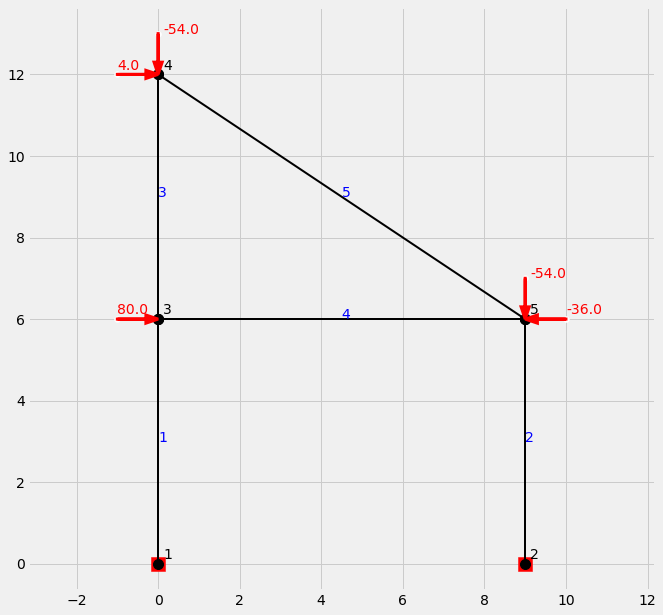

In [8]:
Frame_3.Draw_Frame_Setup(figure_size=[10,10], arrow_line_width=3,width_of_arrow=0.2)

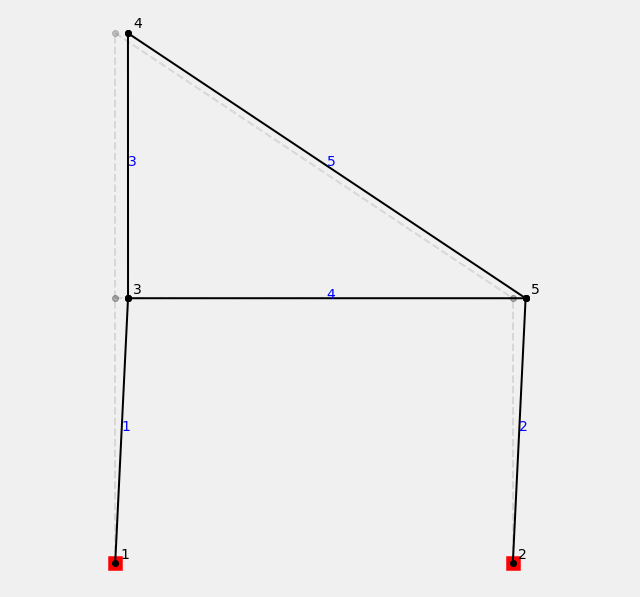

In [9]:
Frame_3.Draw_Frame_Displacements(figure_size = [10,10], magnification_factor=5)

In [10]:
Frame_3.reactions_

{1: [-31.876196688320476, 40.32723601591135, 110.32451652903445],
 2: [-16.12380331167867, 67.67276398408879, 78.62060761416471]}

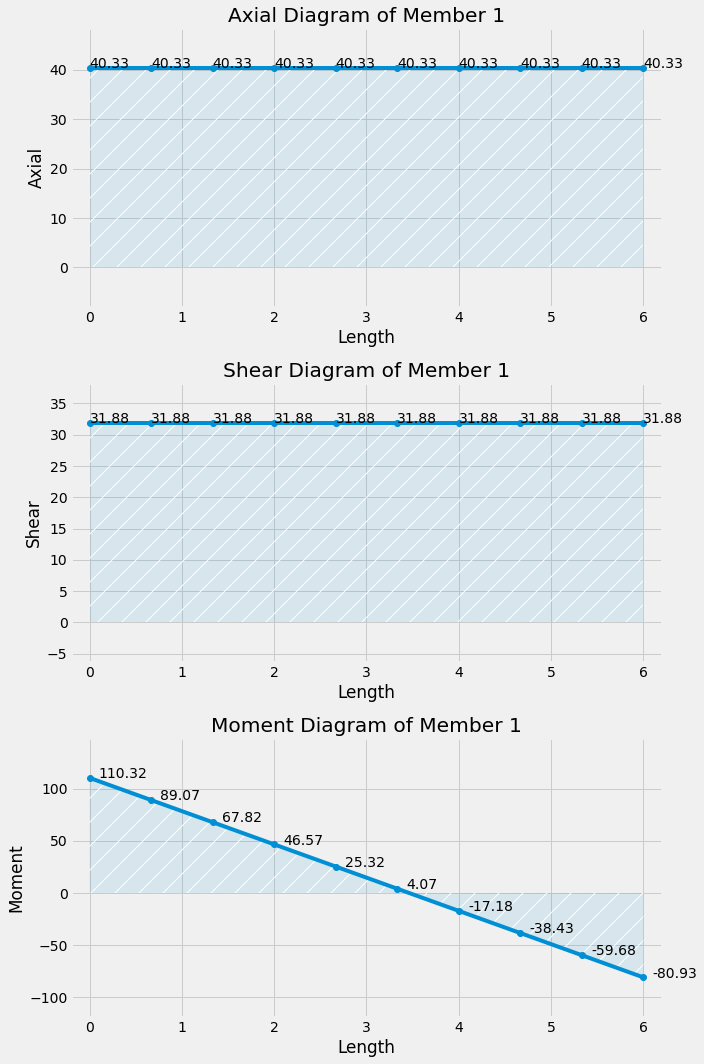

In [11]:
M1.Plot_Diagrams()

In [12]:
M1.Summary()

At Left End:
Axial: 40.32723601591135
Shear: 31.876196688320476
Moment: 110.32451652903445

At Right End:
Axial: 40.32723601591135
Shear: 31.876196688320476
Moment: -80.9326636008884

Minimum and Maximum
Minimum Shear: 31.876196688320476
Maximum Shear: 31.876196688320476
Minimum Moment: -80.9326636008884
Maximum Moment: 110.32451652903445


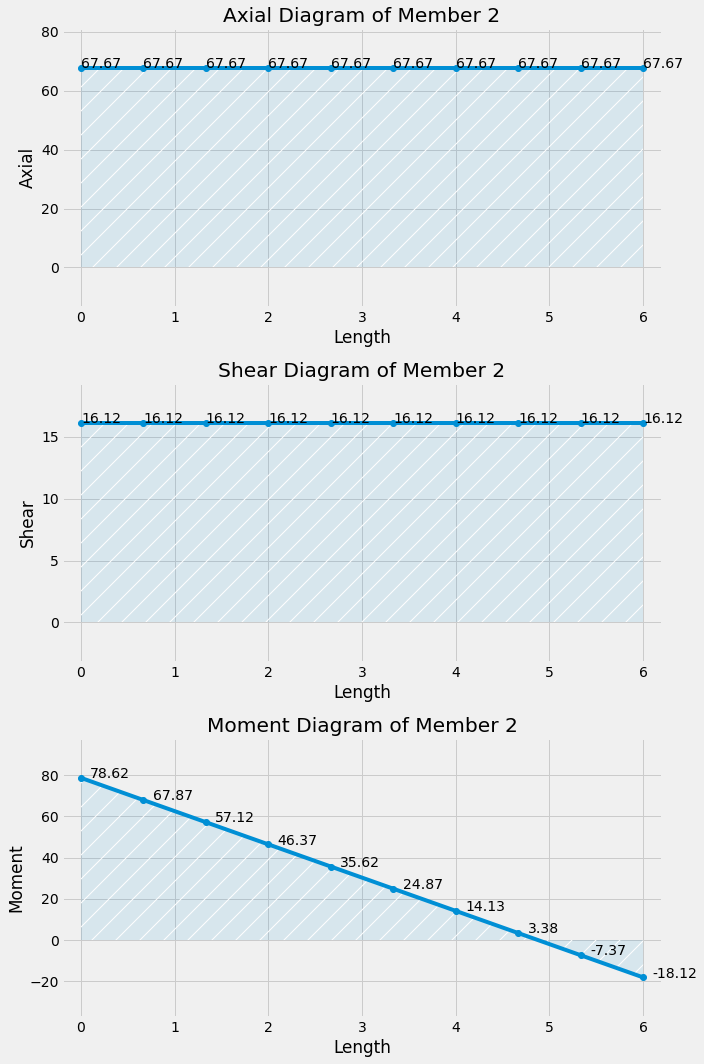

In [13]:
M2.Plot_Diagrams()

In [14]:
M2.Summary()

At Left End:
Axial: 67.67276398408879
Shear: 16.12380331167867
Moment: 78.62060761416471

At Right End:
Axial: 67.67276398408879
Shear: 16.12380331167867
Moment: -18.122212255907314

Minimum and Maximum
Minimum Shear: 16.12380331167867
Maximum Shear: 16.12380331167867
Minimum Moment: -18.122212255907314
Maximum Moment: 78.62060761416471


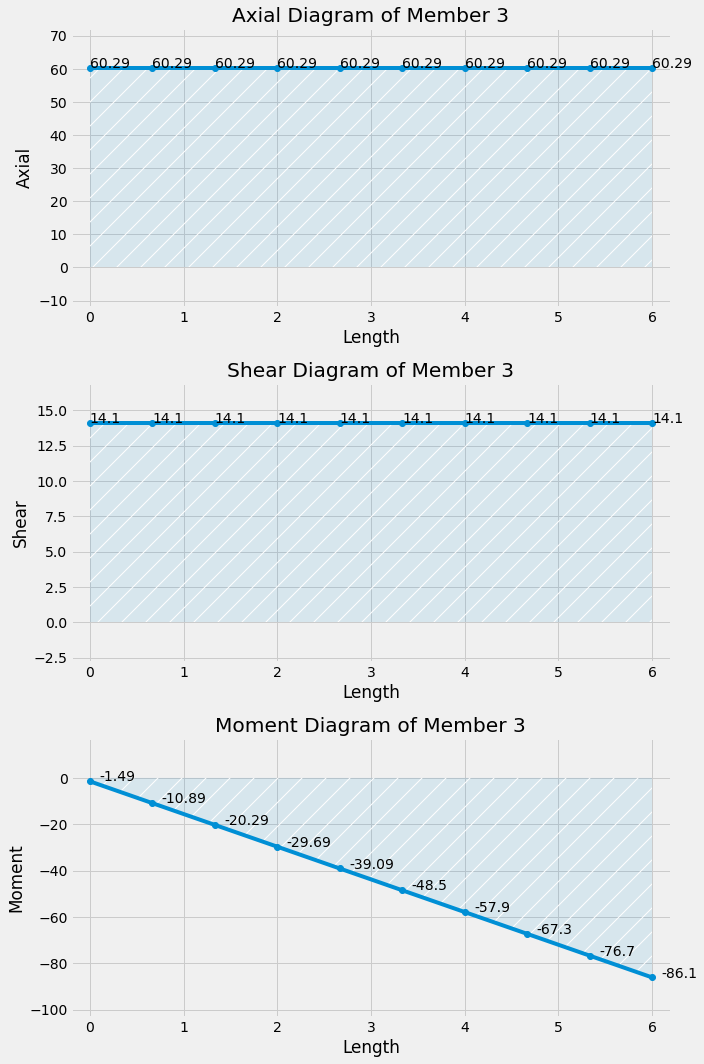

In [15]:
M3.Plot_Diagrams()

In [16]:
M3.Summary()

At Left End:
Axial: 60.28556167175445
Shear: 14.101872183989371
Moment: -1.4890456262982212

At Right End:
Axial: 60.28556167175445
Shear: 14.101872183989371
Moment: -86.10027873023445

Minimum and Maximum
Minimum Shear: 14.101872183989371
Maximum Shear: 14.101872183989371
Minimum Moment: -86.10027873023445
Maximum Moment: -1.4890456262982212


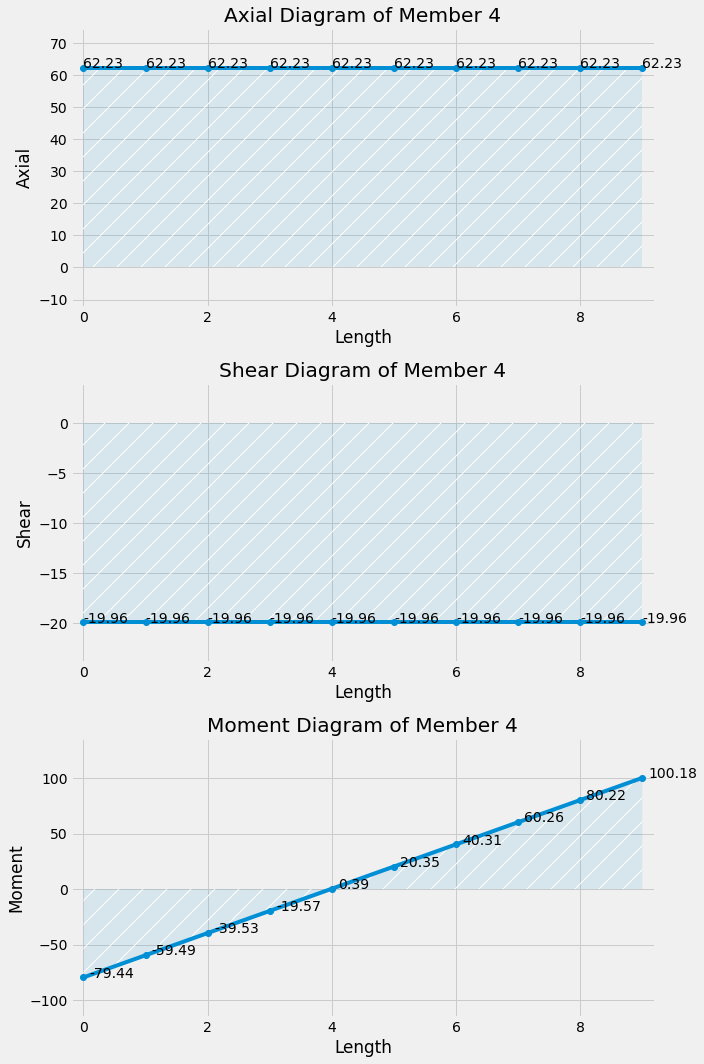

In [17]:
M4.Plot_Diagrams()

In [18]:
M4.Summary()

At Left End:
Axial: 62.22567549567066
Shear: -19.9583256558431
Moment: -79.44361797459018

At Right End:
Axial: 62.22567549567066
Shear: -19.9583256558431
Moment: 100.18131292799774

Minimum and Maximum
Minimum Shear: -19.9583256558431
Maximum Shear: -19.9583256558431
Minimum Moment: -79.44361797459018
Maximum Moment: 100.18131292799774


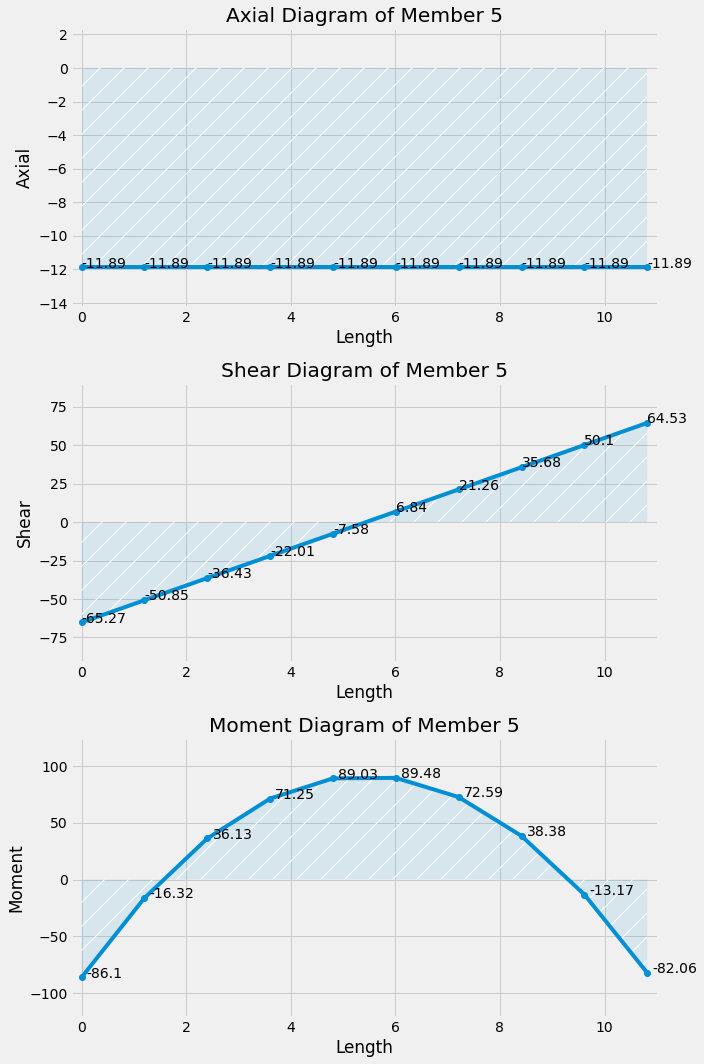

In [19]:
M5.Plot_Diagrams()

In [20]:
M5.Summary()

At Left End:
Axial: -11.891868016757144
Shear: -65.27353000199074
Moment: -86.10027873023446

At Right End:
Axial: -11.891868016757144
Shear: 64.52631591471288
Moment: -82.05910067209044

Minimum and Maximum
Minimum Shear: -65.27353000199074
Maximum Shear: 64.52631591471288
Minimum Moment: -86.10027873023446
Maximum Moment: 89.47815352429004
